In [1]:
import numpy as np # linear algebra
import pandas as pd # train_data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s3e5/sample_submission.csv")

### Preprocessing and analysing the train_data

In [3]:
train_data.sample(5)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1538,1538,9.9,0.74,0.21,3.00,0.087,21.0,67.0,1.00040,3.38,0.57,9.5,5
627,627,8.3,0.30,0.33,2.40,0.085,26.0,53.0,0.99484,3.27,0.62,12.3,6
1331,1331,8.3,0.70,0.24,2.20,0.100,5.0,15.0,0.99760,3.12,0.49,9.3,5
1585,1585,7.1,0.62,0.12,4.65,0.072,21.0,65.0,0.99746,3.42,0.64,10.9,6
1451,1451,9.9,0.50,0.35,2.70,0.116,17.0,53.0,0.99786,3.17,0.62,10.5,5


In [4]:
train_data.describe(include = 'all')

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [5]:
# checking the of values in 'quality' and counting
train_data.quality.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [6]:
# Checking the null values
train_data.isnull().sum().sum()

0

In [7]:
# checking the duplicated values
train_data.duplicated().sum()


0

In [8]:
# correlation of quality with all the other factors used in wine
train_data.corr()['quality'].sort_values(ascending = True)


total sulfur dioxide   -0.225670
volatile acidity       -0.219287
density                -0.153198
free sulfur dioxide    -0.060217
chlorides              -0.046624
pH                      0.016378
Id                      0.025684
residual sugar          0.048156
fixed acidity           0.073852
citric acid             0.141797
sulphates               0.366939
alcohol                 0.482833
quality                 1.000000
Name: quality, dtype: float64

In [9]:
# test_data.shape

### Visualizing the train_data

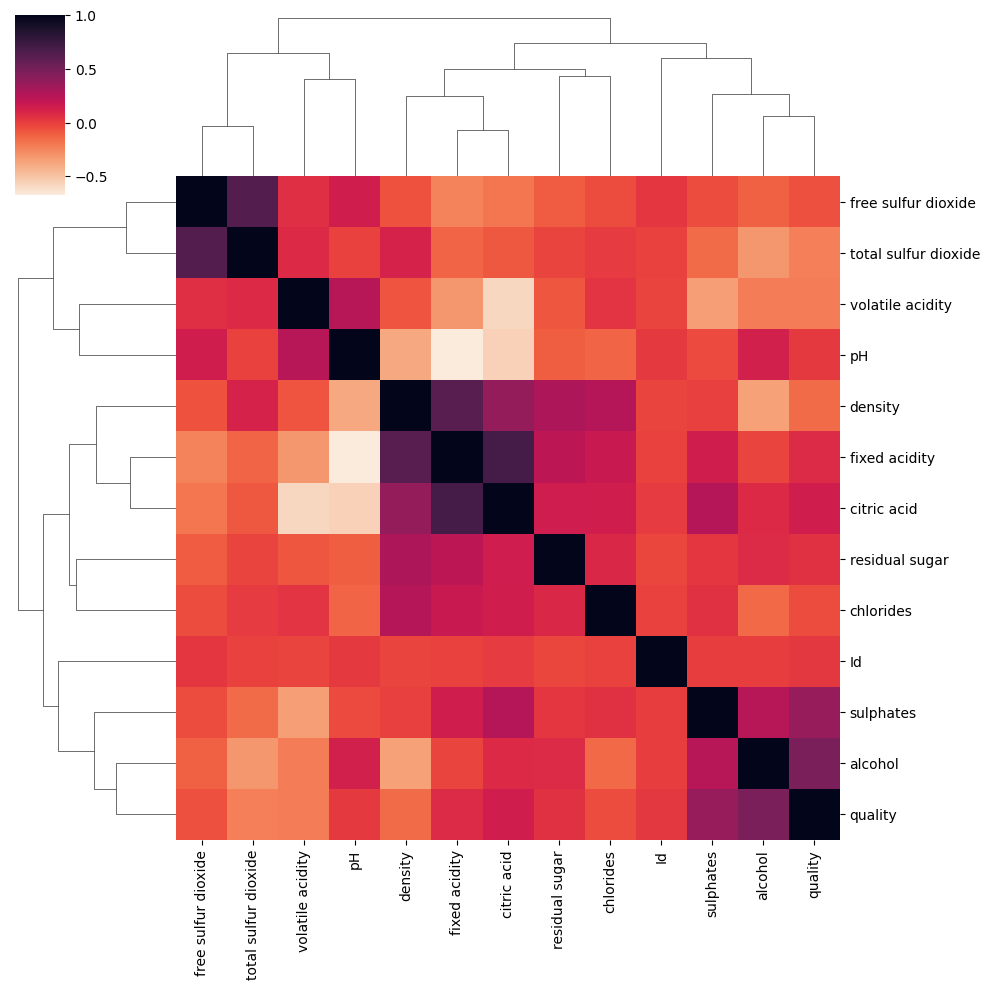

In [10]:
sns_plot = sns.clustermap(train_data.corr(), cmap="rocket_r")


/tmp/ipykernel_20/1919730049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['quality'])


<AxesSubplot: xlabel='quality', ylabel='Density'>

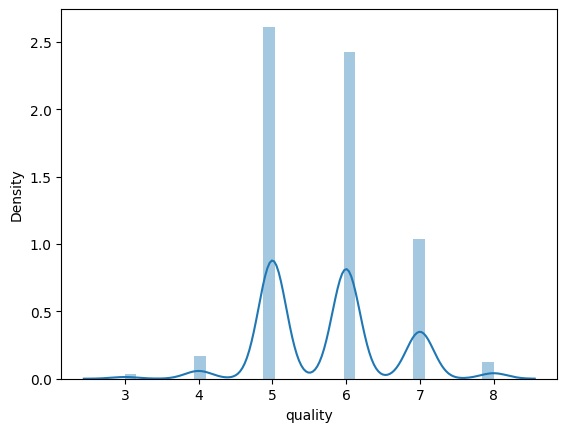

In [11]:
sns.distplot(train_data['quality'])

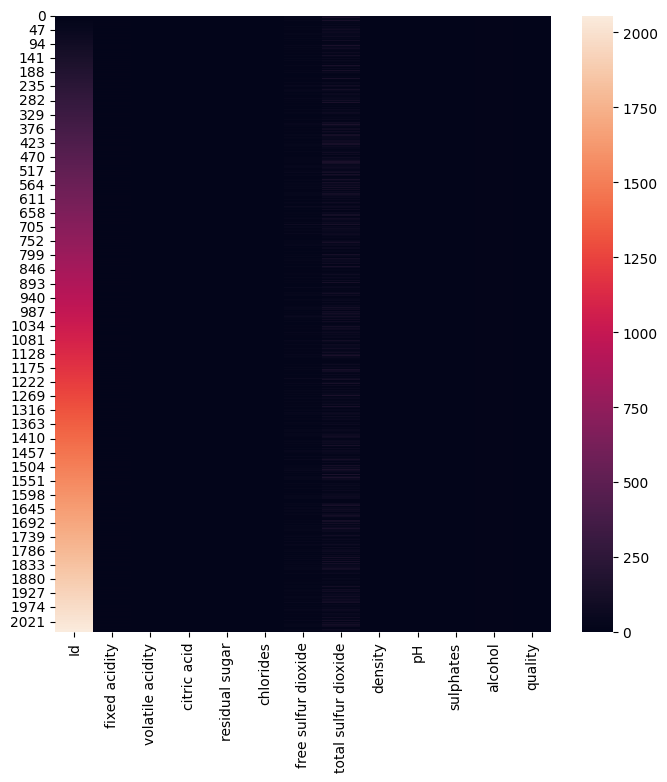

In [12]:
fig,ax = plt.subplots(figsize =(8,8))
sns.heatmap(train_data[['Id','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']])
plt.show()

<AxesSubplot: xlabel='total sulfur dioxide', ylabel='Count'>

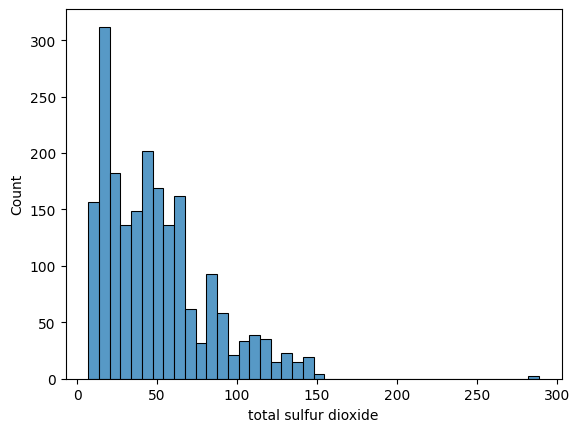

In [13]:
sns.histplot(data=train_data, x='total sulfur dioxide')

/tmp/ipykernel_20/2058150986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['citric acid'])


<AxesSubplot: xlabel='citric acid', ylabel='Density'>

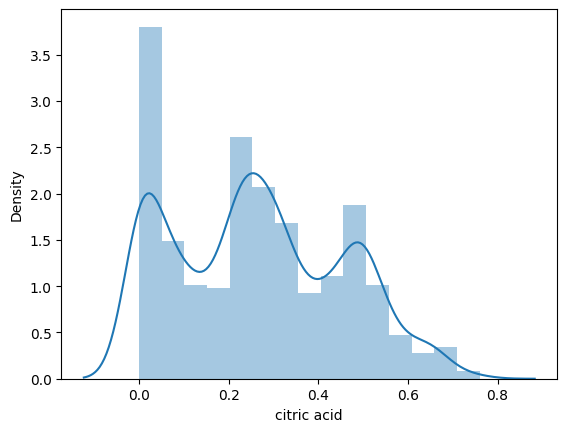

In [14]:
sns.distplot(train_data['citric acid'])

### Test Data

In [15]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')

In [16]:
test_data.head(4)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7


In [17]:
test_data.shape

(1372, 12)

In [18]:
test_data.isnull().sum().sum()

0

In [19]:
test_data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,2741.500000,8.369606,0.524311,0.270569,2.415926,0.081307,17.162536,49.089286,0.996670,3.312223,0.647267,10.473081
std,396.206596,1.664694,0.176942,0.185731,0.921155,0.026566,9.974082,32.803721,0.001822,0.141405,0.134792,1.027170
min,2056.000000,4.900000,0.120000,0.000000,1.300000,0.012000,1.000000,8.000000,0.990070,2.740000,0.390000,8.800000
25%,2398.750000,7.100000,0.390000,0.110000,2.000000,0.070000,8.000000,23.000000,0.995380,3.210000,0.550000,9.600000
50%,2741.500000,7.900000,0.500000,0.260000,2.200000,0.078000,16.000000,43.000000,0.996600,3.310000,0.620000,10.200000
75%,3084.250000,9.100000,0.635000,0.420000,2.500000,0.087000,24.000000,66.000000,0.997800,3.390000,0.730000,11.200000
max,3427.000000,15.600000,1.330000,0.760000,8.300000,0.467000,68.000000,165.000000,1.003200,4.010000,1.620000,14.000000


### Training the data 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
x=train_data.drop('quality',axis=1)
y=train_data['quality']

In [22]:
print(x)
print(y)

        Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            8.0              0.50         0.39            2.20   
1        1            9.3              0.30         0.73            2.30   
2        2            7.1              0.51         0.03            2.10   
3        3            8.1              0.87         0.22            2.60   
4        4            8.5              0.36         0.30            2.30   
...    ...            ...               ...          ...             ...   
2051  2051            6.6              0.31         0.13            2.00   
2052  2052            9.7              0.59         0.21            1.80   
2053  2053            7.7              0.43         0.42            1.70   
2054  2054            9.1              0.50         0.00            1.75   
2055  2055            6.2              0.31         0.18            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [24]:
# normalizing the data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy: {}%".format(accuracy))

Accuracy: 55.04%


In [26]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
accuracy_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(accuracy_randomforest)

55.29


In [27]:
logit_preds_test = pd.DataFrame(y_pred).mode(axis = 0).loc[0, ]

submission['quality'] = logit_preds_test.astype(int)

submission.to_csv('randomsubmission3.csv', index = False)